In [1]:
#ML Lab 2
#KNN

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


dataset = pd.read_csv("Social_Network_Ads.csv")

from sklearn.cross_validation import train_test_split
X = dataset.iloc[:,[2,3]]
y =dataset.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)


/home/sois/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [3]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [4]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1])

In [5]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 3, 29]])

In [6]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start= X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step= 0.01),
                     np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01))


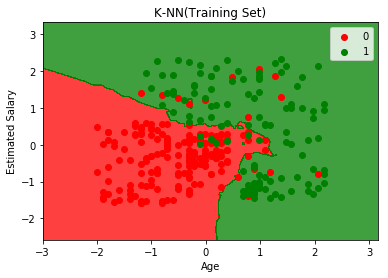

In [35]:
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75,cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())


for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','green'))(i),label = j)


plt.title("K-NN(Training Set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.legend()
plt.show()

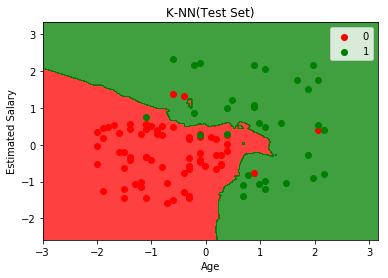

In [7]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start= X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step= 0.01),
                     np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75,cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())


for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','green'))(i),label = j)


plt.title("K-NN(Test Set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.legend()
plt.show()